In [7]:
# import testing libraries
import sys
sys.path.append('../')

from mlrefined_libraries import text_generation_lib as textlib
from mlrefined_libraries import time_series_lib as timelib
import matplotlib.pyplot as plt

from autograd import numpy as np
datapath = '../datasets/'

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load in text, preprocess, and parse into characters

Load in the raw characters of the text, and preprocess (remove jargon characters, lower-case all, etc.,).

In [2]:
# load in and preprocess text
csvname = datapath + "war_of_the_worlds.txt"
demo = textlib.text_utils.Text()
demo.load_preprocess(csvname)

Convert characters to keys, and create functions to go back and forth between keys and characters.

In [3]:
# parse into individual characters
demo.parse_chars()

Window text with given order, and convert window-d input to one-hot encoded vectors.

In [4]:
order = 1
x,y = demo.encode_io_pairs_fixed(demo.keys,order)

# take subsample of data

In [19]:
num_sample = 50
x_sample = x[:,:num_sample]
y_sample = y[:,:num_sample]

# plot heatmap / spectrogram of real input vectors

In [265]:
def show_series(series,chars):
    num_chars,num_samples = series.shape
    
    fig, ax = plt.subplots(figsize = (9,6))
    ax = plt.subplot(111)
    a,b = np.meshgrid(np.arange(num_samples),np.arange(num_chars))

    ### x-axis Customize minor tick labels ###
    # make custom labels
    x_ticker_range = np.arange(0.5,num_samples,1).tolist()
    x_char_range = demo.chars[:num_samples]
    ax.xaxis.tick_top()

    ## assign major or minor ticklabels? - chosen major by default
    ax.xaxis.set_major_locator(ticker.FixedLocator(x_ticker_range))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_char_range))

    ### y-axis Customize minor tick labels ###
    # make custom labels
    y_char_range = np.unique(chars)
    num_chars = np.size(unique_chars)
    y_ticker_range = np.arange(0.5,num_chars,1).tolist()

    ## assign major or minor ticklabels? - chosen major by default
    ax.yaxis.set_major_locator(ticker.FixedLocator(y_ticker_range))
    ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_char_range))
    
    cdict = {
  'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
  'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
  'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.8, 0.45))
    }
    
#     import matplotlib as m

#     cm = m.colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

    
    ax.pcolormesh(a, b, -series,cmap = 'hot',edgecolor = 'k') # hot, gist_heat, cubehelix


<IPython.core.display.Javascript object>


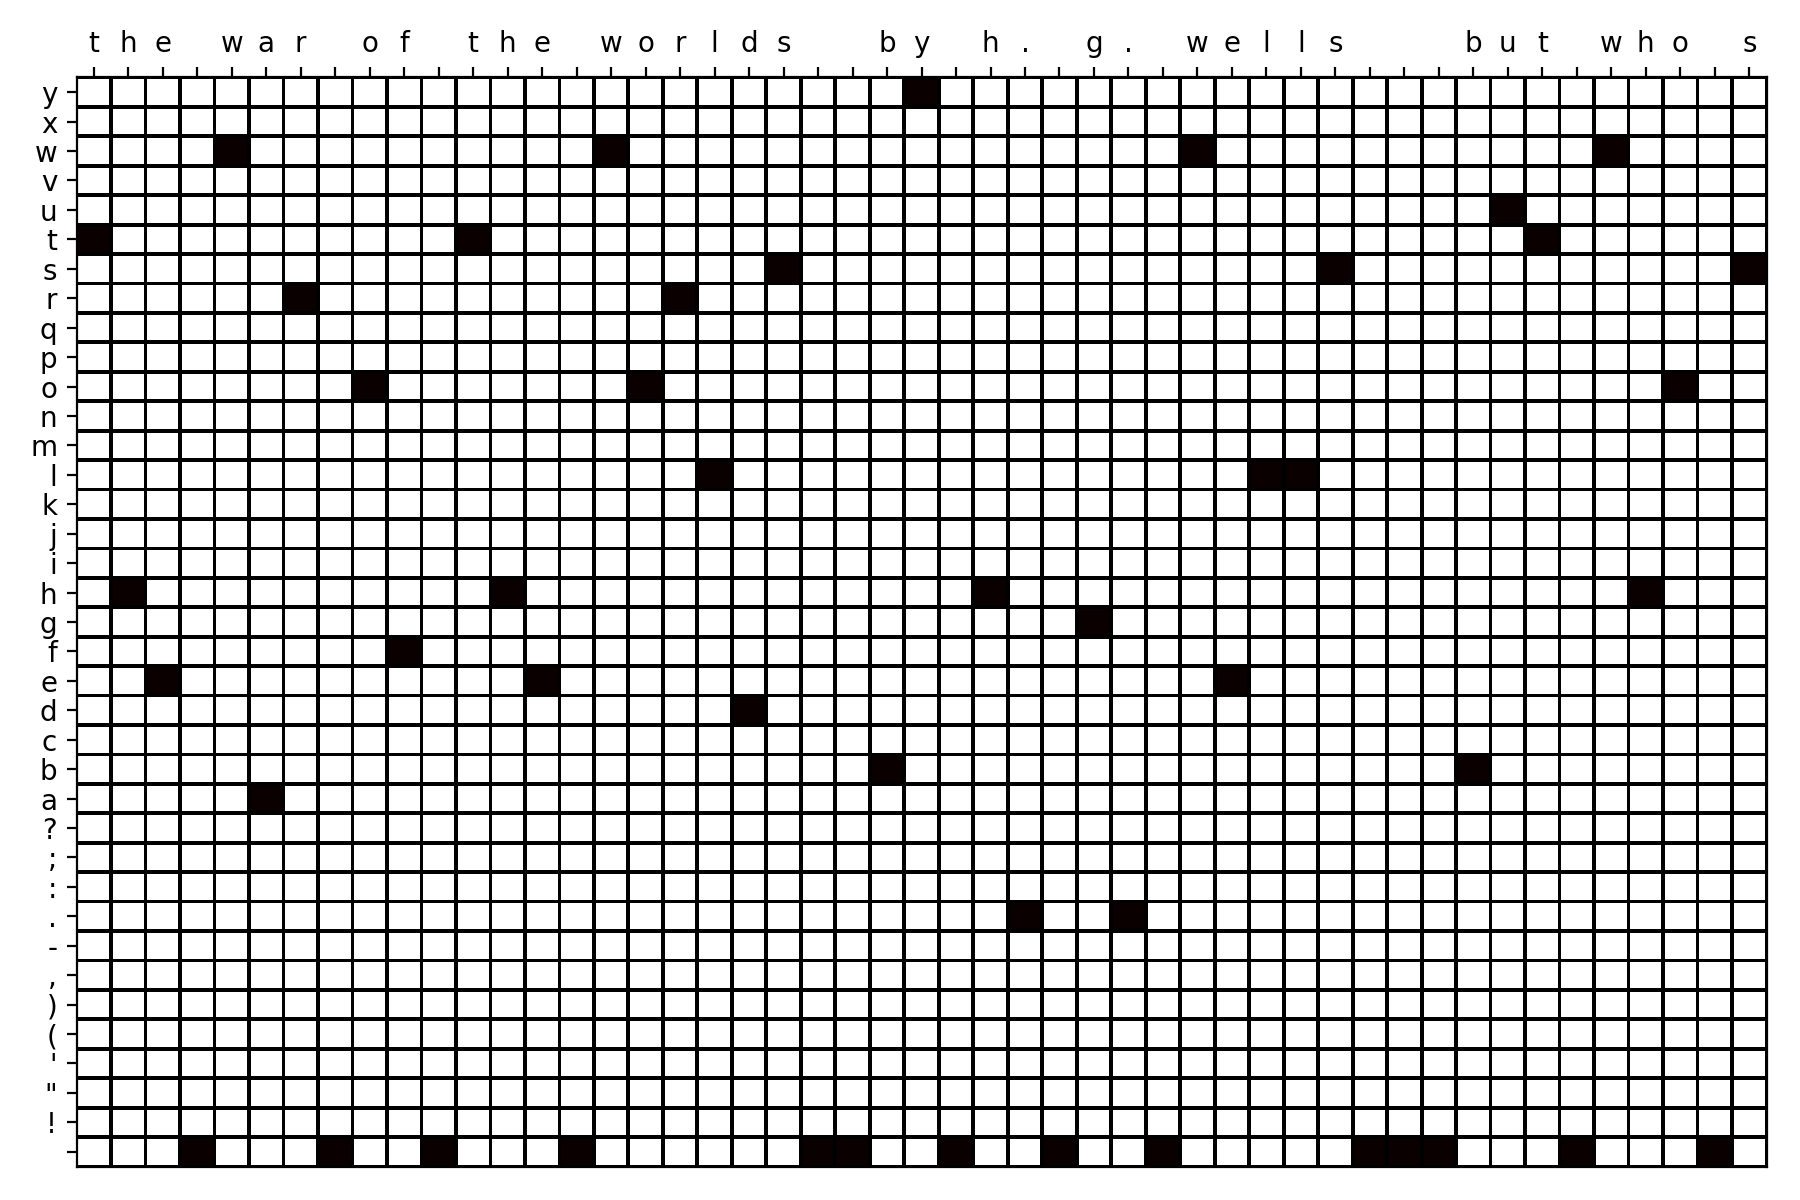

In [266]:
show_series(x_sample,demo.chars)

# exponential average

<IPython.core.display.Javascript object>


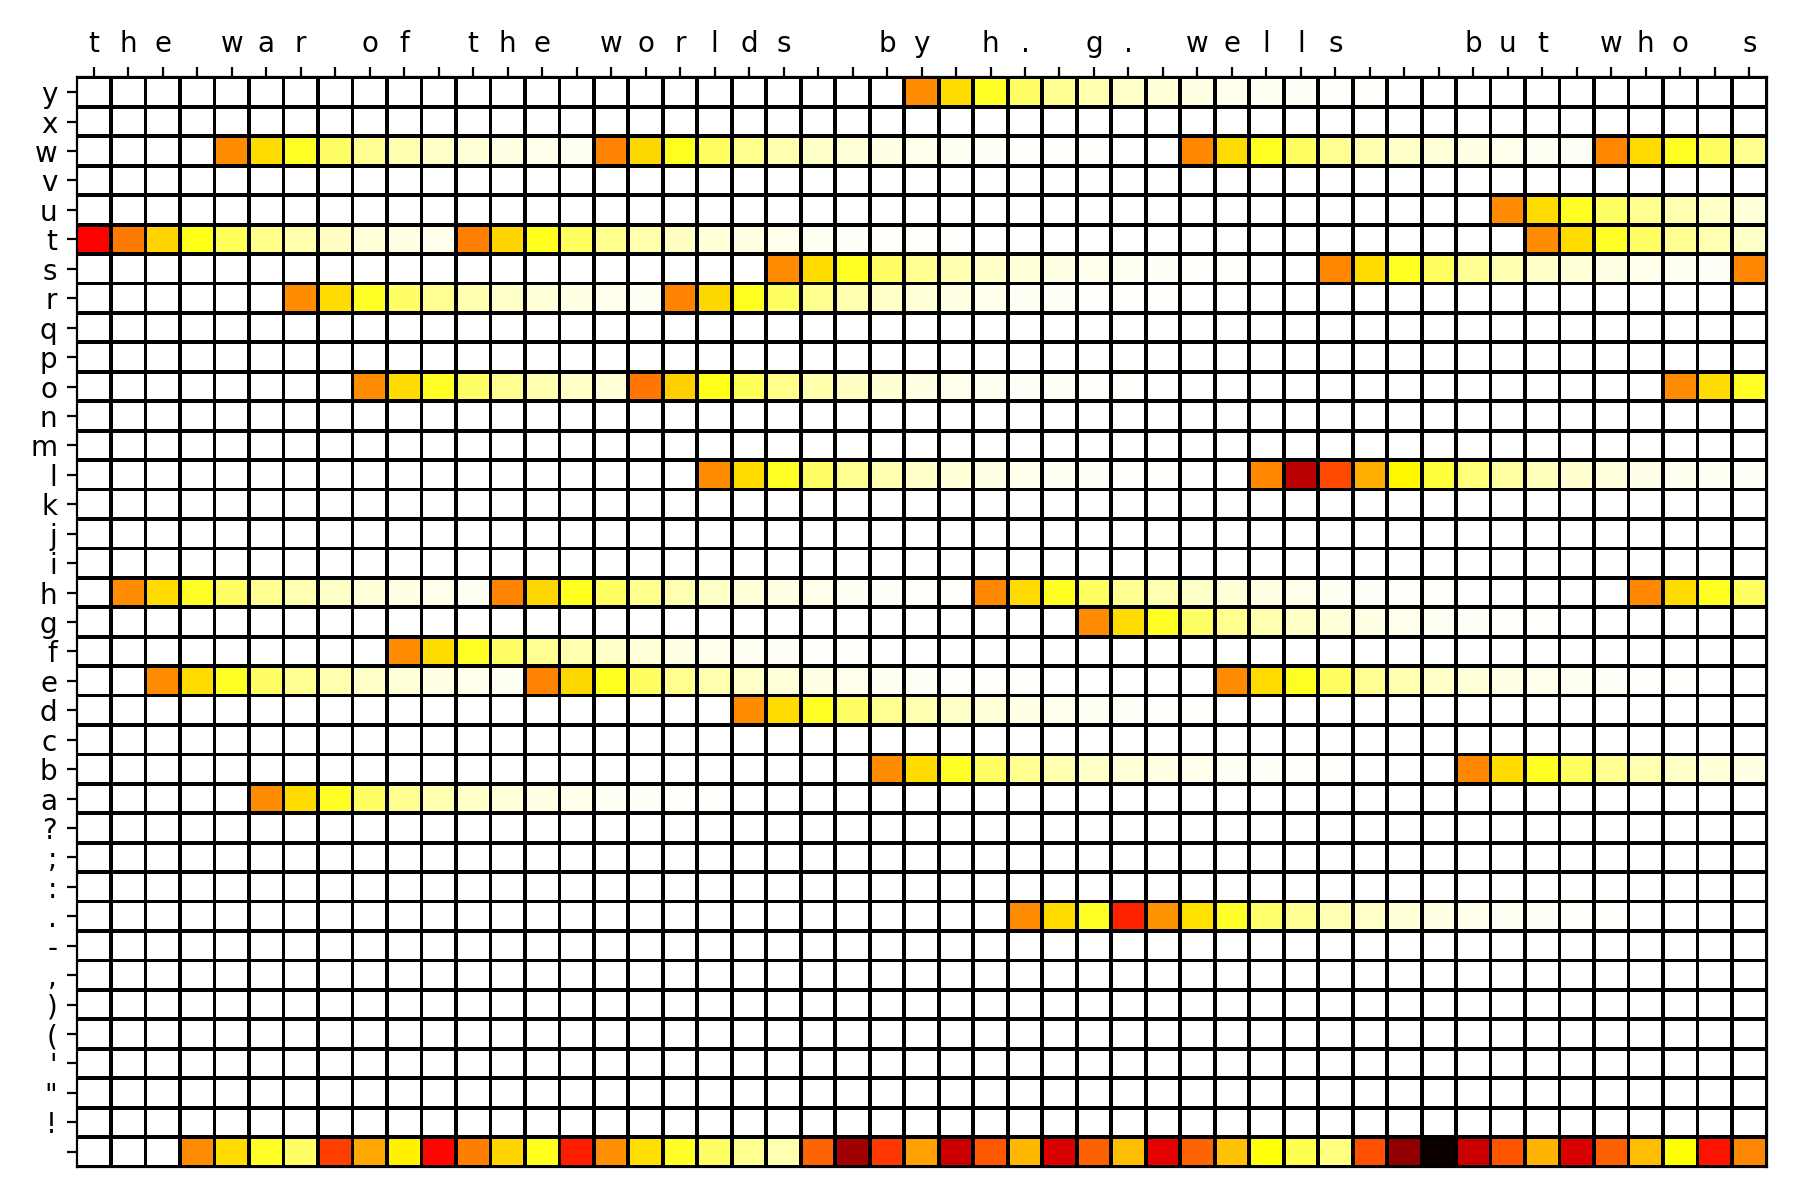

In [278]:
def step(h_t_prev,x_t,w):
    return w[0][0]*h_t_prev + w[1][0]*x_t

# exponential average function
def exponential_average(x,w):
    # set initial conditions of h to values of x
    h = [x[:,0]]
    
    # range over x and create h
    for t in range(1,np.shape(x)[1]):
        # get current point and prior hidden state
        h_t_prev = h[-1]
        x_t = x[:,t]

        # make next element and store
        h_t = step(h_t_prev,x_t,w)
        h.append(h_t)
    return np.array(h).T

# create sequence with w set to particular value
w = np.random.rand(2,1)
# w[1] = 1 - w[0]
h = exponential_average(x_sample,w)
show_series(h,demo.chars)